# Activity 2.1

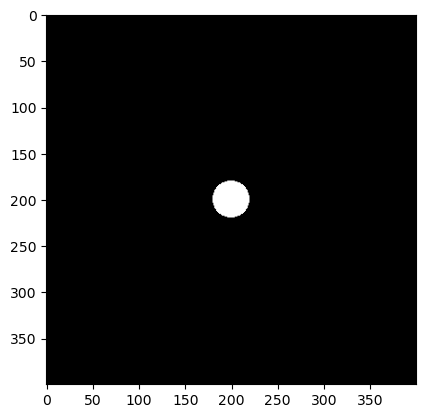

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift

N = 400 #the higher num is the finer
x = np.linspace(-1,1,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
A[np.where(R<0.1)] = 1.0

plt.imshow(A, cmap='gray')

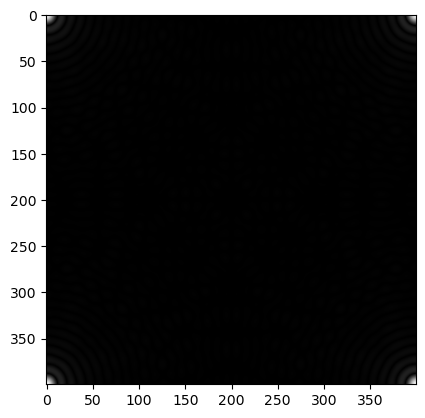

In [18]:
FA = np.fft.fft2(A)
plt.imshow(abs(FA), cmap='gray')

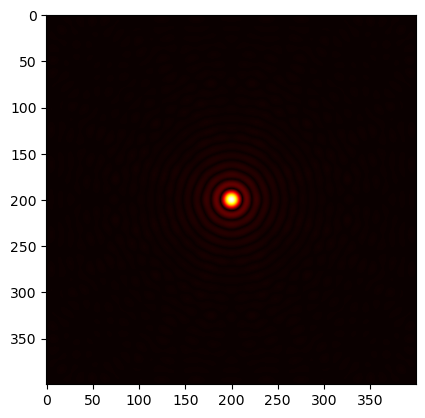

In [19]:
FAshifted = np.fft.fftshift(FA)
plt.imshow(abs(FAshifted), cmap = 'hot')

In [24]:
from numpy.fft import fft2, ifft2
import cv2
dark_img = cv2.imread('cal sith eyes.jpg')

dark_img_gray = cv2.cvtColor(dark_img, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(dark_img_gray, cmap='gray')

Irec = fft2(fft2(dark_img_gray))
plt.subplot(1,3,2)
plt.imshow(abs(Irec), cmap='gray')

Irec2 = ifft2(fft2(dark_img_gray))
plt.subplot(1,3,3)
plt.imshow(abs(Irec2), cmap='gray')

ModuleNotFoundError: No module named 'cv2'

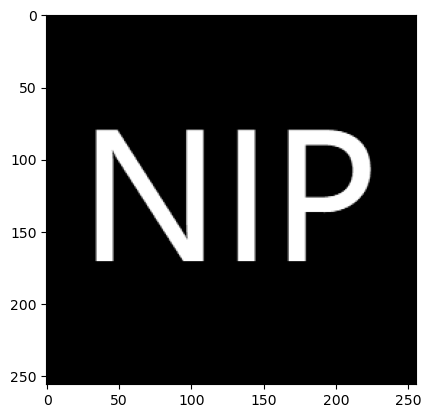

In [25]:
from PIL import Image

nip = Image.open('NIP.tif').convert('L')
plt.imshow(nip, cmap='gray')

In [15]:
def circle(r):    # generate circle aperture

    N = 256
    x = np.linspace(-1,1,N)
    y = x
    X,Y = np.meshgrid(x,y)
    R = np.sqrt(X**2+Y**2)
    aperture = np.zeros(np.shape(R))
    r = r/100
    aperture[np.where(R<r)] = 1.0
    
    return aperture


aperture_fftshift = fftshift(circle(12.8))    # ftshift the aperture
nip_fft = fft2(nip[:,:,1])                    # ft the nip    
conv = nip_fft*aperture_fftshift              # multiply
conv_inv = ifft2(conv)                        # inverse ft
plt.imshow(abs(conv_inv), cmap='gray')

TypeError: 'Image' object is not subscriptable